In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'

In [11]:
# define function for exact values
def internal_energy(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th   
    return -J*( th + ch*thN )/( 1 + thN )

def heat_capacity(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th   
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

def mag(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

def susceptibility(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th  
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

n_blocks = 20
sample_size = 16

In [12]:
temp_list = np.linspace(0.5, 2.0, sample_size)
mag_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/magnetization_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

cv_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/specific_heat_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

chi_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/susceptibility_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

energy_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/total_energy_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

chi_data_gibbs

,#BLOCK:,ACTUAL_X:,X_AVE:,ERROR:,T
0,20,77.44880,74.95610,1.570040,0.5
1,20,46.39790,46.18490,1.034590,0.6
2,20,29.54540,24.76060,0.555097,0.7
3,20,14.83820,15.51520,0.211832,0.8
4,20,11.40000,10.14250,0.194185,0.9
5,20,6.88819,7.38051,0.107855,1.0
6,20,5.80961,5.46547,0.048317,1.1
7,20,4.51457,4.45890,0.048837,1.2
8,20,3.62124,3.58922,0.029838,1.3
9,20,3.08390,2.99708,0.026196,1.4


In [13]:
mag_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/magnetization_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

cv_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/specific_heat_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

chi_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/susceptibility_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

energy_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/total_energy_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

In [14]:
T = np.linspace(0.2, 3.0, 100)
internal_energy_values = [internal_energy(t) for t in T]
heat_capacity_values = [heat_capacity(t) for t in T]
magnetization_values = [mag(t) for t in T]
susceptibility_values = [susceptibility(t) for t in T]

energy_data_metro

,#BLOCK:,ACTUAL_TE:,TE_AVE:,ERROR:,T
0,20,-0.980600,-0.973478,0.001073,0.5
1,20,-0.926600,-0.937276,0.001013,0.6
2,20,-0.891144,-0.891447,0.000812,0.7
3,20,-0.851208,-0.848062,0.000723,0.8
4,20,-0.803496,-0.803962,0.000568,0.9
5,20,-0.763936,-0.761831,0.000490,1.0
6,20,-0.721360,-0.720532,0.000488,1.1
7,20,-0.682488,-0.682601,0.000463,1.2
8,20,-0.647096,-0.646015,0.000507,1.3
9,20,-0.616912,-0.613993,0.000446,1.4


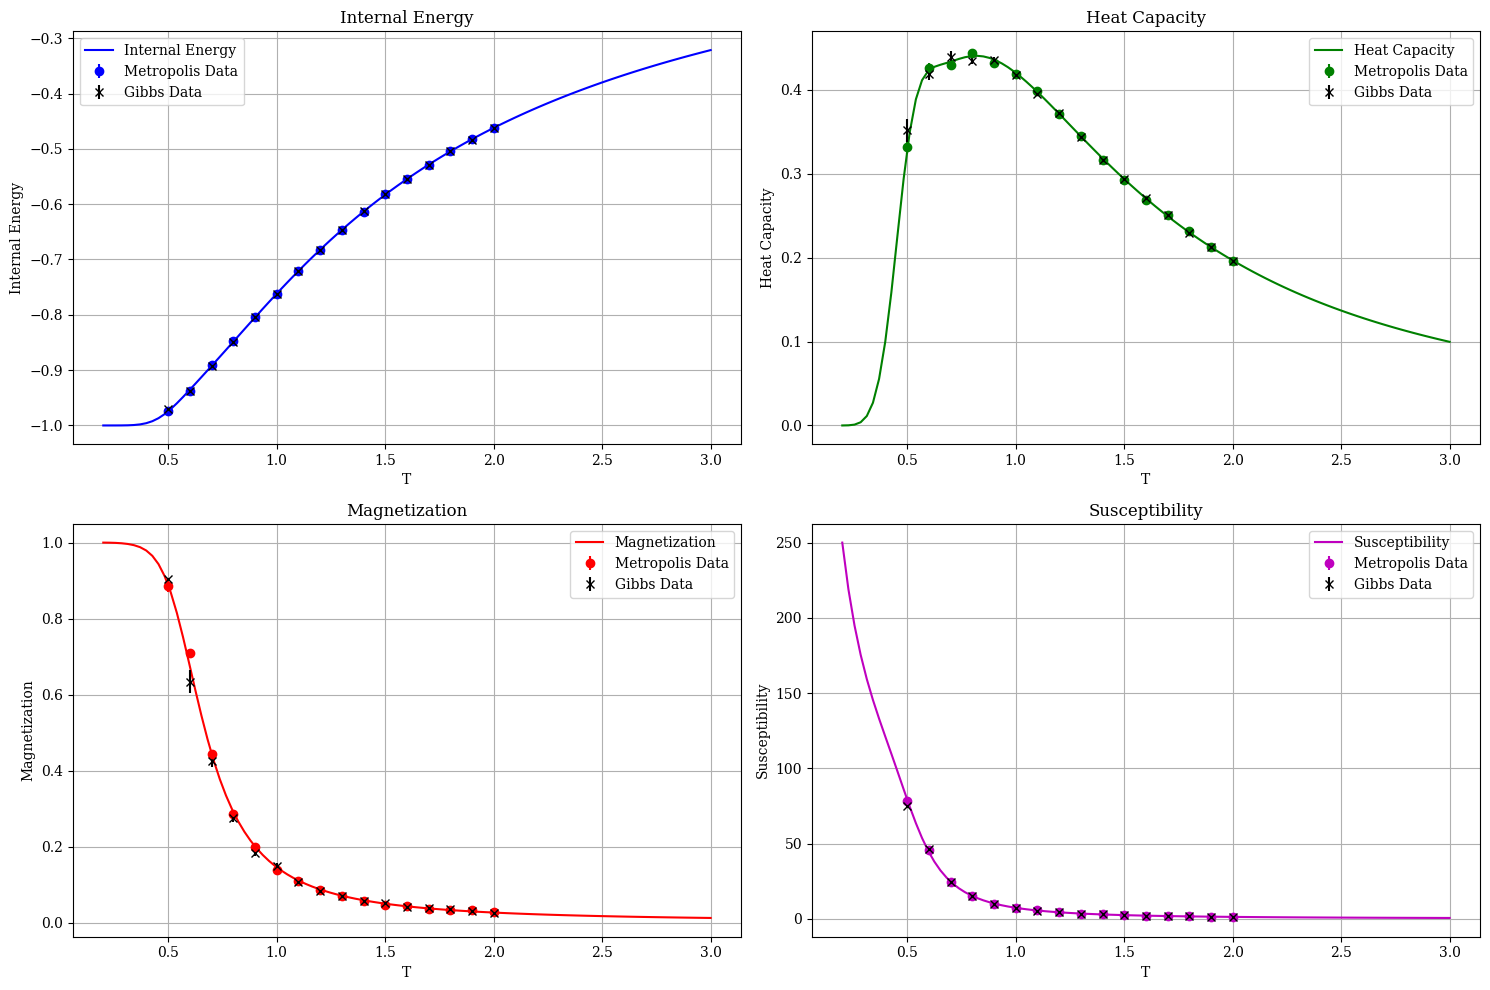

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(T, internal_energy_values, label='Internal Energy', color='b')
axs[0, 0].errorbar(energy_data_metro['T'], energy_data_metro['TE_AVE:'], yerr=energy_data_metro['ERROR:'], fmt='o', ls='none', color='b', label='Metropolis Data')
axs[0, 0].errorbar(energy_data_gibbs['T'], energy_data_gibbs['TE_AVE:'], yerr=energy_data_gibbs['ERROR:'], fmt='x', ls = 'none', color='black', label='Gibbs Data')
axs[0, 0].set_title('Internal Energy')
axs[0, 0].set_xlabel('T')
axs[0, 0].set_ylabel('Internal Energy')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(T, heat_capacity_values, label='Heat Capacity', color='g')
axs[0, 1].errorbar(energy_data_metro['T'], cv_data_metro['CV_AVE:'], yerr=cv_data_metro['ERROR:'], fmt='o', ls='none', color='g', label='Metropolis Data')
axs[0, 1].errorbar(energy_data_gibbs['T'], cv_data_gibbs['CV_AVE:'], yerr=cv_data_gibbs['ERROR:'], fmt='x', ls = 'none', color='black', label='Gibbs Data')
axs[0, 1].set_title('Heat Capacity')
axs[0, 1].set_xlabel('T')
axs[0, 1].set_ylabel('Heat Capacity')
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].plot(T, magnetization_values, label='Magnetization', color='r')
axs[1, 0].errorbar(energy_data_metro['T'], mag_data_metro['M_AVE:'], yerr=mag_data_metro['ERROR:'], fmt='o', ls='none', color='r', label='Metropolis Data')
axs[1, 0].errorbar(energy_data_gibbs['T'], mag_data_gibbs['M_AVE:'], yerr=mag_data_gibbs['ERROR:'], fmt='x', ls = 'none', color='black', label='Gibbs Data')
axs[1, 0].set_title('Magnetization')
axs[1, 0].set_xlabel('T')
axs[1, 0].set_ylabel('Magnetization')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(T, susceptibility_values, label='Susceptibility', color='m')
axs[1, 1].errorbar(energy_data_metro['T'], chi_data_metro['X_AVE:'], yerr=chi_data_metro['ERROR:'], fmt='o', ls='none', color='m', label='Metropolis Data')
axs[1, 1].errorbar(energy_data_gibbs['T'], chi_data_gibbs['X_AVE:'], yerr=chi_data_gibbs['ERROR:'], fmt='x', ls = 'none', color='black', label='Gibbs Data')
axs[1, 1].set_title('Susceptibility')
axs[1, 1].set_xlabel('T')
axs[1, 1].set_ylabel('Susceptibility')
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()

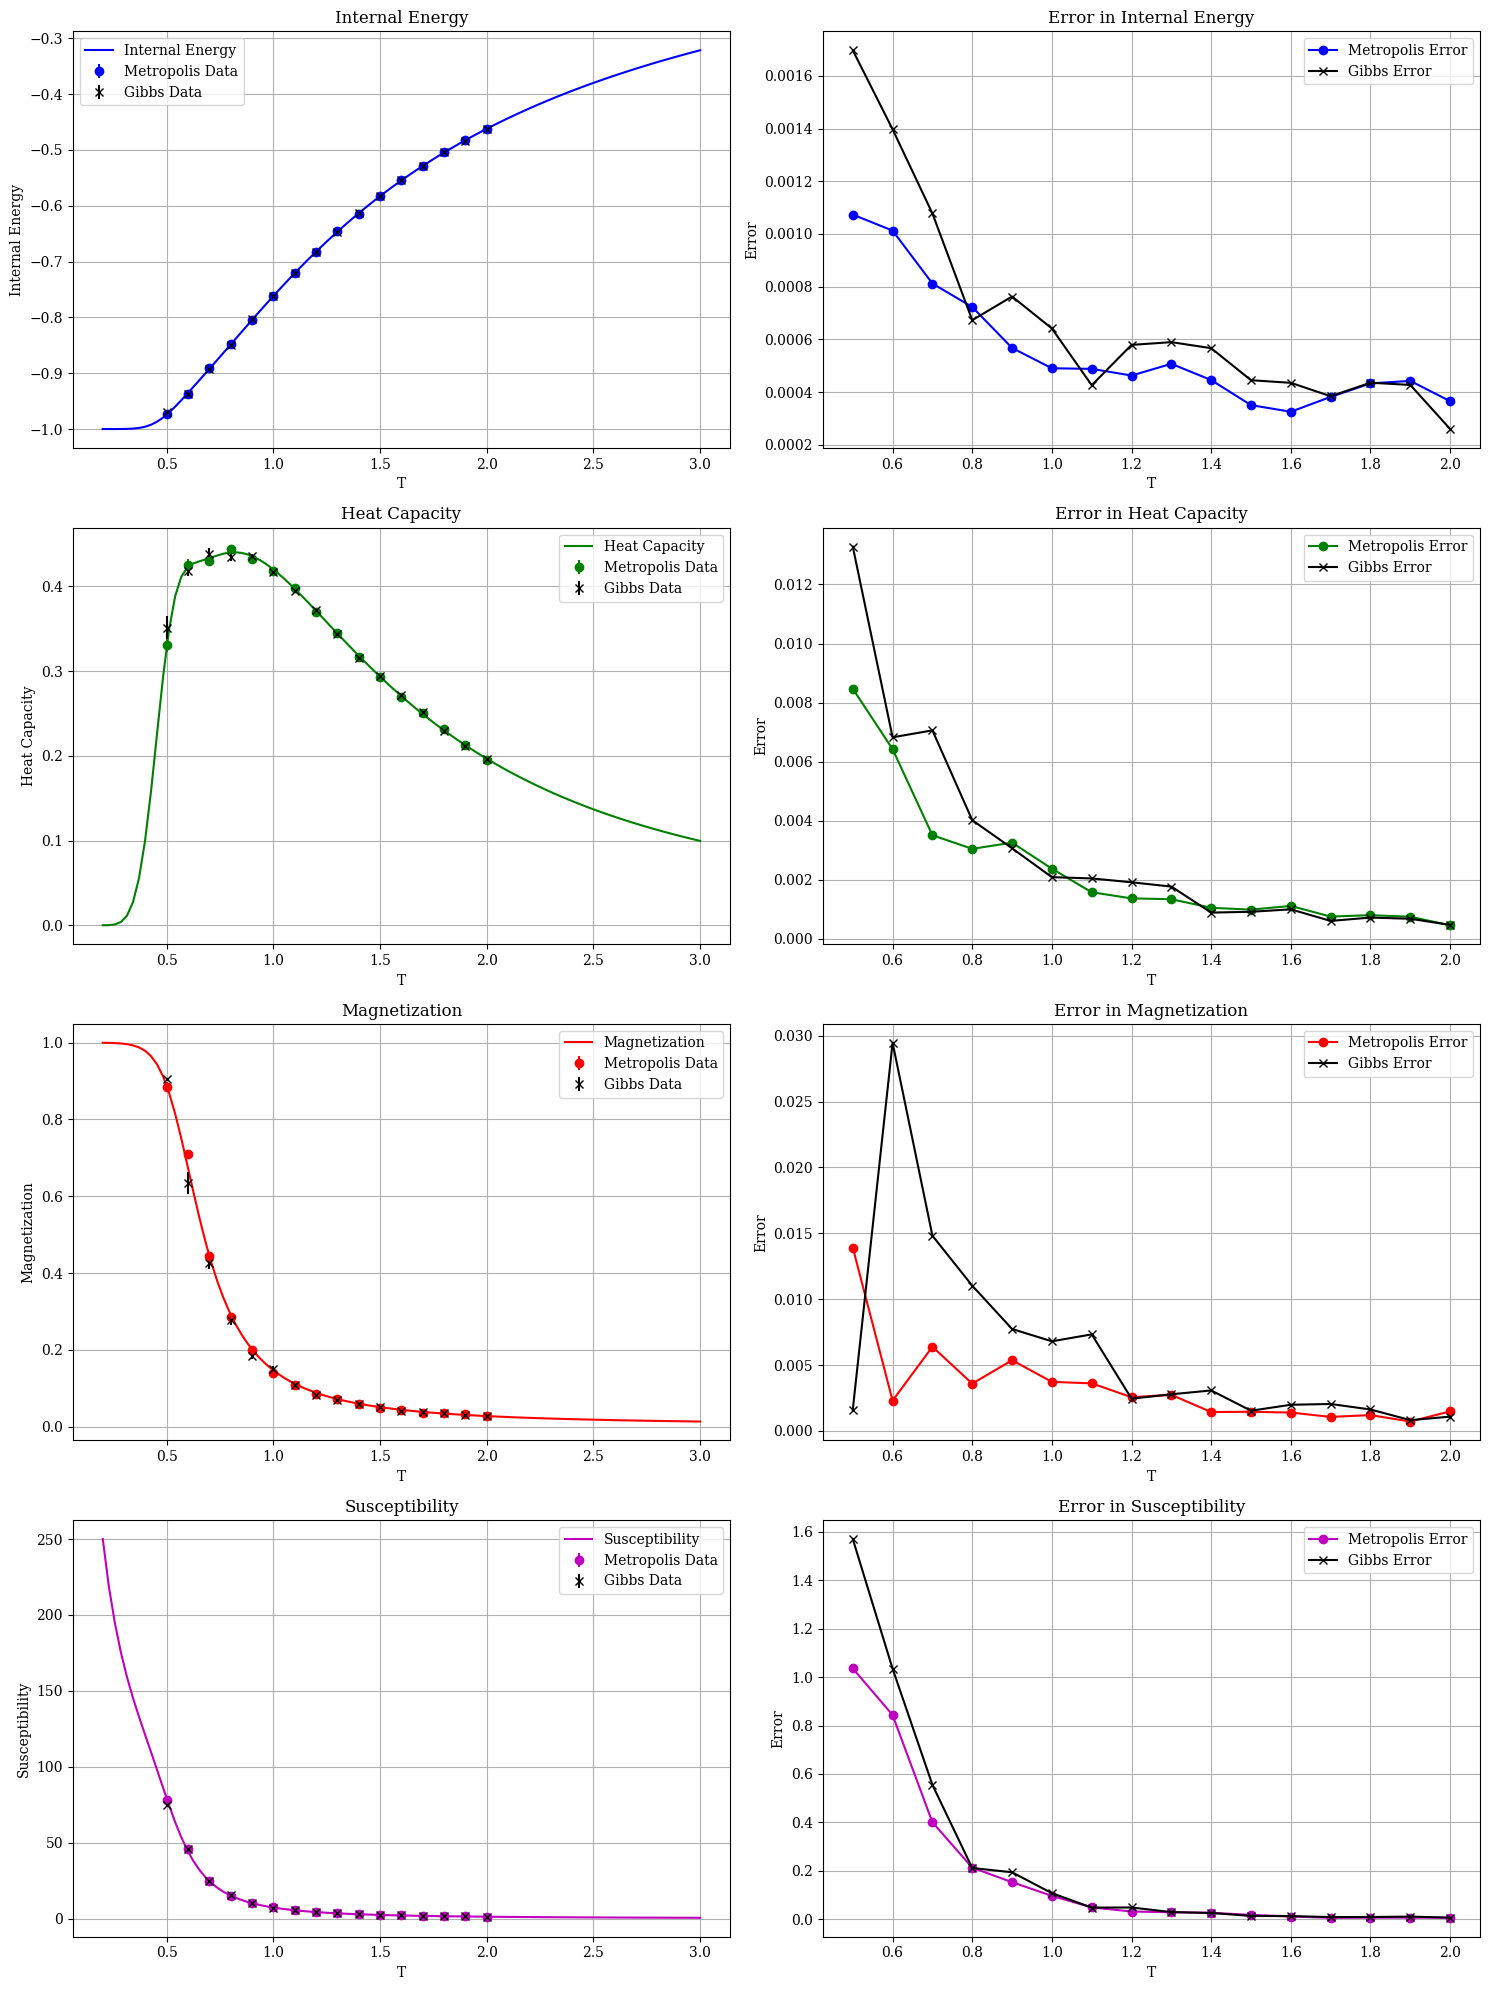

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20), gridspec_kw={'width_ratios': [1, 1]})

# Internal Energy
axs[0, 0].plot(T, internal_energy_values, label='Internal Energy', color='b')
axs[0, 0].errorbar(energy_data_metro['T'], energy_data_metro['TE_AVE:'], yerr=energy_data_metro['ERROR:'], fmt='o', ls='none', color='b', label='Metropolis Data')
axs[0, 0].errorbar(energy_data_gibbs['T'], energy_data_gibbs['TE_AVE:'], yerr=energy_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[0, 0].set_title('Internal Energy')
axs[0, 0].set_xlabel('T')
axs[0, 0].set_ylabel('Internal Energy')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(energy_data_metro['T'], energy_data_metro['ERROR:'], 'o-', color='b', label='Metropolis Error')
axs[0, 1].plot(energy_data_gibbs['T'], energy_data_gibbs['ERROR:'], 'x-', color='black', label='Gibbs Error')
axs[0, 1].set_title('Error in Internal Energy')
axs[0, 1].set_xlabel('T')
axs[0, 1].set_ylabel('Error')
axs[0, 1].grid()
axs[0, 1].legend()

# Heat Capacity
axs[1, 0].plot(T, heat_capacity_values, label='Heat Capacity', color='g')
axs[1, 0].errorbar(energy_data_metro['T'], cv_data_metro['CV_AVE:'], yerr=cv_data_metro['ERROR:'], fmt='o', ls='none', color='g', label='Metropolis Data')
axs[1, 0].errorbar(energy_data_gibbs['T'], cv_data_gibbs['CV_AVE:'], yerr=cv_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[1, 0].set_title('Heat Capacity')
axs[1, 0].set_xlabel('T')
axs[1, 0].set_ylabel('Heat Capacity')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(cv_data_metro['T'], cv_data_metro['ERROR:'], 'o-', color='g', label='Metropolis Error')
axs[1, 1].plot(cv_data_gibbs['T'], cv_data_gibbs['ERROR:'], 'x-', color='black', label='Gibbs Error')
axs[1, 1].set_title('Error in Heat Capacity')
axs[1, 1].set_xlabel('T')
axs[1, 1].set_ylabel('Error')
axs[1, 1].grid()
axs[1, 1].legend()

# Magnetization
axs[2, 0].plot(T, magnetization_values, label='Magnetization', color='r')
axs[2, 0].errorbar(energy_data_metro['T'], mag_data_metro['M_AVE:'], yerr=mag_data_metro['ERROR:'], fmt='o', ls='none', color='r', label='Metropolis Data')
axs[2, 0].errorbar(energy_data_gibbs['T'], mag_data_gibbs['M_AVE:'], yerr=mag_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[2, 0].set_title('Magnetization')
axs[2, 0].set_xlabel('T')
axs[2, 0].set_ylabel('Magnetization')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].plot(mag_data_metro['T'], mag_data_metro['ERROR:'], 'o-', color='r', label='Metropolis Error')
axs[2, 1].plot(mag_data_gibbs['T'], mag_data_gibbs['ERROR:'], 'x-', color='black', label='Gibbs Error')
axs[2, 1].set_title('Error in Magnetization')
axs[2, 1].set_xlabel('T')
axs[2, 1].set_ylabel('Error')
axs[2, 1].grid()
axs[2, 1].legend()

# Susceptibility
axs[3, 0].plot(T, susceptibility_values, label='Susceptibility', color='m')
axs[3, 0].errorbar(energy_data_metro['T'], chi_data_metro['X_AVE:'], yerr=chi_data_metro['ERROR:'], fmt='o', ls='none', color='m', label='Metropolis Data')
axs[3, 0].errorbar(energy_data_gibbs['T'], chi_data_gibbs['X_AVE:'], yerr=chi_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[3, 0].set_title('Susceptibility')
axs[3, 0].set_xlabel('T')
axs[3, 0].set_ylabel('Susceptibility')
axs[3, 0].grid()
axs[3, 0].legend()

axs[3, 1].plot(chi_data_metro['T'], chi_data_metro['ERROR:'], 'o-', color='m', label='Metropolis Error')
axs[3, 1].plot(chi_data_gibbs['T'], chi_data_gibbs['ERROR:'], 'x-', color='black', label='Gibbs Error')
axs[3, 1].set_title('Error in Susceptibility')
axs[3, 1].set_xlabel('T')
axs[3, 1].set_ylabel('Error')
axs[3, 1].grid()
axs[3, 1].legend()

plt.tight_layout()
plt.show()